In [14]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import nltk
#nltk.download('vader_lexicon')

In [15]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['NFLX','GOOG','FB']

In [16]:
news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'}) # to get access from finviz
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser') # will return the source code of that url page
    # from the source code, it is noticed that all the articles are stored in a table with the id=news-table
    # so lets access the whole table
    news_table = html.find(id='news-table') 
    news_tables[ticker] = news_table # so here we store the whole table in a dictionary with key 'ticker'


In [17]:
parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df1 = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
print(df)

    ticker       date       time  \
0     NFLX  Apr-21-22  06:00PM     
1     NFLX  Apr-21-22  05:17PM     
2     NFLX  Apr-21-22  04:56PM     
3     NFLX  Apr-21-22  04:43PM     
4     NFLX  Apr-21-22  04:33PM     
..     ...        ...        ...   
295     FB  Apr-14-22  09:54AM     
296     FB  Apr-14-22  09:43AM     
297     FB  Apr-14-22  09:16AM     
298     FB  Apr-14-22  09:00AM     
299     FB  Apr-14-22  06:50AM     

                                                 title  
0                Why Netflix Stock Flopped Again Today  
1       3 Reasons to Buy Netflix, and 1 Reason to Sell  
2    Ackmans Pershing Square recent record of hits ...  
3    US STOCKS-Wall St ends down as Powell plops 50...  
4    Dow Jones Falls As Powell Says This On Inflati...  
..                                                 ...  
295           Facebook Makes a Huge Controversial Move  
296  Netflix and Meta See Earnings Pessimism After ...  
297  Meta is already failing on its promise of a be...

In [18]:
vader = SentimentIntensityAnalyzer()

print (df['title'])

0                  Why Netflix Stock Flopped Again Today
1         3 Reasons to Buy Netflix, and 1 Reason to Sell
2      Ackmans Pershing Square recent record of hits ...
3      US STOCKS-Wall St ends down as Powell plops 50...
4      Dow Jones Falls As Powell Says This On Inflati...
                             ...                        
295             Facebook Makes a Huge Controversial Move
296    Netflix and Meta See Earnings Pessimism After ...
297    Meta is already failing on its promise of a be...
298    2 supersized Q1 deals pushed the Bay Area's se...
299    Elon Musk offers to buy 100% of Twitter for $5...
Name: title, Length: 300, dtype: object


In [19]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
f2 = lambda title: vader.polarity_scores(title)['pos']
df['pos'] = df['title'].apply(f2)
f3 = lambda title: vader.polarity_scores(title)['neg']
df['neg'] = df['title'].apply(f2)
f4 = lambda title: vader.polarity_scores(title)['neu']
df['neu'] = df['title'].apply(f2)

print(df)

    ticker       date       time  \
0     NFLX  Apr-21-22  06:00PM     
1     NFLX  Apr-21-22  05:17PM     
2     NFLX  Apr-21-22  04:56PM     
3     NFLX  Apr-21-22  04:43PM     
4     NFLX  Apr-21-22  04:33PM     
..     ...        ...        ...   
295     FB  Apr-14-22  09:54AM     
296     FB  Apr-14-22  09:43AM     
297     FB  Apr-14-22  09:16AM     
298     FB  Apr-14-22  09:00AM     
299     FB  Apr-14-22  06:50AM     

                                                 title  compound    pos  \
0                Why Netflix Stock Flopped Again Today    0.0000  0.000   
1       3 Reasons to Buy Netflix, and 1 Reason to Sell    0.0000  0.000   
2    Ackmans Pershing Square recent record of hits ...   -0.2263  0.000   
3    US STOCKS-Wall St ends down as Powell plops 50...    0.0000  0.000   
4    Dow Jones Falls As Powell Says This On Inflati...    0.3400  0.124   
..                                                 ...       ...    ...   
295           Facebook Makes a Huge Contro

In [20]:
f = lambda title: vader.polarity_scores(title)['compound']

df['compund'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

f1 = lambda title: vader.polarity_scores(title)['neu']
df1['neu'] = df1['title'].apply(f1)
df1['date'] = pd.to_datetime(df.date).dt.date

<Figure size 1440x720 with 0 Axes>

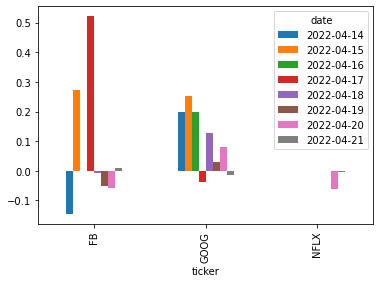

In [21]:
plt.figure(figsize=(20,10))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()

<Figure size 1440x720 with 0 Axes>

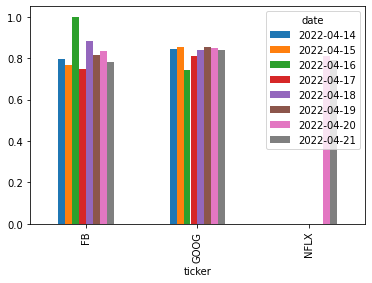

In [22]:
plt.figure(figsize=(20,10))
mean_df1 = df1.groupby(['ticker', 'date']).mean().unstack()
mean_df1.head()
mean_df1 = mean_df1.xs('neu', axis="columns")
mean_df1.plot(kind='bar')
plt.show()

<Figure size 1440x720 with 0 Axes>

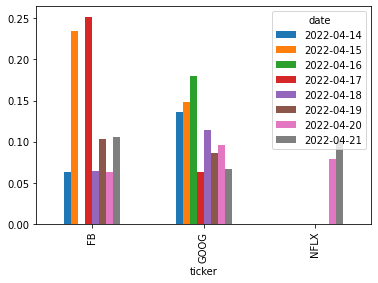

In [23]:
plt.figure(figsize=(20,10))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('neg', axis="columns")
mean_df.plot(kind='bar')
plt.show()

<Figure size 1440x720 with 0 Axes>

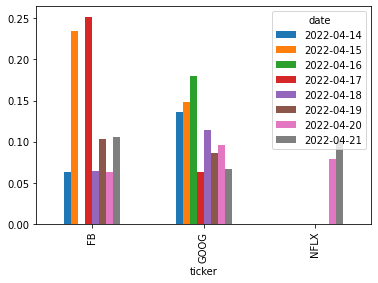

In [24]:
plt.figure(figsize=(20,10))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('pos', axis="columns")
mean_df.plot(kind='bar')
plt.show()

<Figure size 720x576 with 0 Axes>

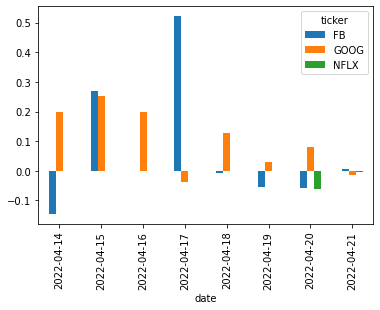

In [25]:
plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker','date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound',axis='columns').transpose()
mean_df.plot(kind='bar')
plt.show()

In [26]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
f2 = lambda title: vader.polarity_scores(title)['pos']
df['pos'] = df['title'].apply(f2)
f3 = lambda title: vader.polarity_scores(title)['neg']
df['neg'] = df['title'].apply(f2)
f4 = lambda title: vader.polarity_scores(title)['neu']
df['neu'] = df['title'].apply(f2)

print(df)


    ticker        date       time  \
0     NFLX  2022-04-21  06:00PM     
1     NFLX  2022-04-21  05:17PM     
2     NFLX  2022-04-21  04:56PM     
3     NFLX  2022-04-21  04:43PM     
4     NFLX  2022-04-21  04:33PM     
..     ...         ...        ...   
295     FB  2022-04-14  09:54AM     
296     FB  2022-04-14  09:43AM     
297     FB  2022-04-14  09:16AM     
298     FB  2022-04-14  09:00AM     
299     FB  2022-04-14  06:50AM     

                                                 title  compound    pos  \
0                Why Netflix Stock Flopped Again Today    0.0000  0.000   
1       3 Reasons to Buy Netflix, and 1 Reason to Sell    0.0000  0.000   
2    Ackmans Pershing Square recent record of hits ...   -0.2263  0.000   
3    US STOCKS-Wall St ends down as Powell plops 50...    0.0000  0.000   
4    Dow Jones Falls As Powell Says This On Inflati...    0.3400  0.124   
..                                                 ...       ...    ...   
295           Facebook Makes a